Blatt 1 - Programmieraufgabe


Aufgabe 4

Formel (*): $p(x) =  \sum_{k=0}^{n} \frac{x^k}{k!} \approx e^{x}$ 

a)
Für alle $i = 0,...,n: y_{i}=a_{i}x_{0}^{i}$ können wir unsere Formel (*) nutzen für $a_{i}=\frac{1}{i!}$

Zur Auswertung des polynoms müssen dann nurnoch alle $y_{i}$ addiert werden.

In [1]:
import math

def naiverNäherungswert(x, n):
    sum = 0
    for k in range(0, n):
        sum += (1/math.factorial(k))*(x**k)
    return sum

Um die Berechnung für alle n=3,6,...,30 auszuführen erstellen wir eine Liste der n_werte

In [2]:
n_werte = list(range(3,31,3))
print(n_werte)

[3, 6, 9, 12, 15, 18, 21, 24, 27, 30]


Nun können wir die Näherungswerte für alle n mit den 3 gegebenen Möglichkeiten für x = -5.5 berechnen

Methode 1: Mit der Formel (*)

Methode 2: Umformung $e^{-5.5}=\frac{1}{e^{5.5}}$ und Formel (*)

Methode 3: Umformung $e^{-5.5}=(e^{-0.5})^{11}$ und Formel (*)

In [3]:
methode1 = {}
methode2 = {}
methode3 = {}

for n in n_werte:
    methode1.update({str(n)+" Iterationen":naiverNäherungswert(-5.5,n)})
    methode2.update({str(n)+" Iterationen":1/(naiverNäherungswert(5.5,n))})
    methode3.update({str(n)+" Iterationen":naiverNäherungswert(-0.5,n)**11})

def print_results(dicts):
    for key, value in dicts.items():
        print(f"{key}: {value}")
print("Methode 1: \n")
print_results(methode1)
print("\nMethode 2: \n")
print_results(methode2)
print("\nMethode 3: \n")
print_results(methode3)

Methode 1: 

3 Iterationen: 10.625
6 Iterationen: -20.916927083333334
9 Iterationen: 8.088704523964534
12 Iterationen: -1.112383365664745
15 Iterationen: 0.07634108477225393
18 Iterationen: 0.0015244256177218817
21 Iterationen: 0.004141926339413438
24 Iterationen: 0.004085996829581963
27 Iterationen: 0.004086778928968469
30 Iterationen: 0.004086771386465238

Methode 2: 

3 Iterationen: 0.046242774566473986
6 Iterationen: 0.007726653534038525
9 Iterationen: 0.004569509614980817
12 Iterationen: 0.0041321763753555995
15 Iterationen: 0.004089219120272027
18 Iterationen: 0.004086848719960148
21 Iterationen: 0.00408677296955549
24 Iterationen: 0.004086771458666171
27 Iterationen: 0.004086771438650141
30 Iterationen: 0.00408677143846531

Methode 3: 

3 Iterationen: 0.0056843418860808015
6 Iterationen: 0.00408527132653394
9 Iterationen: 0.004086771818309631
12 Iterationen: 0.004086771438427688
15 Iterationen: 0.004086771438464059
18 Iterationen: 0.004086771438464059
21 Iterationen: 0.004086771

b)
In dieser Aufgabe werden wir die relativen Fehler der Ergebnisse aus a) plotten


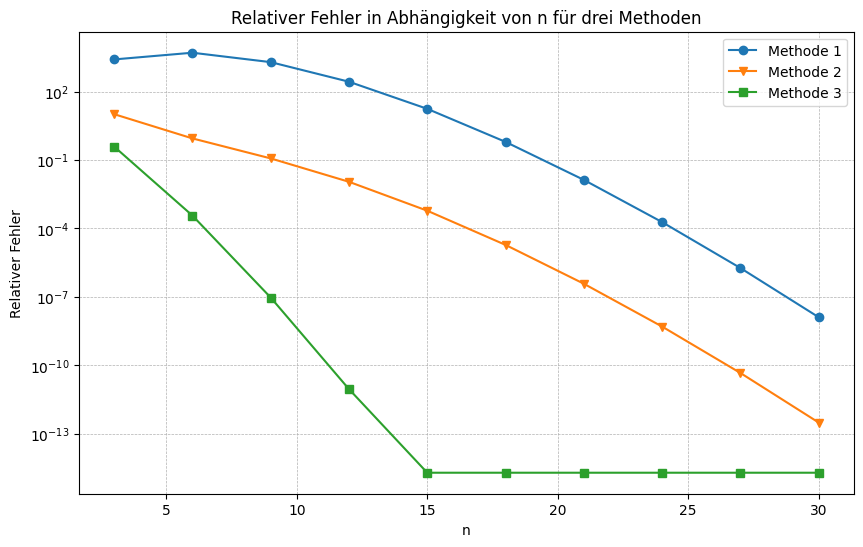

In [4]:
import matplotlib.pyplot as plt

def relFehler(yTilde):
    exact_value = math.exp(-5.5)
    absFehler = abs(yTilde - exact_value)
    return absFehler / abs(exact_value)

meth1_Erel = [relFehler(values) for (keys,values) in methode1.items()]
meth2_Erel = [relFehler(values) for (keys,values) in methode2.items()]
meth3_Erel = [relFehler(values) for (keys,values) in methode3.items()]

# Erstelle das Plot
plt.figure(figsize=(10, 6))
plt.plot(n_werte, meth1_Erel, label="Methode 1", marker='o')
plt.plot(n_werte, meth2_Erel, label="Methode 2", marker='v')
plt.plot(n_werte, meth3_Erel, label="Methode 3", marker='s')

# Logarithmische Skalierung der y-Achse
plt.yscale('log')

# Labels und Titel
plt.xlabel("n")
plt.ylabel("Relativer Fehler")
plt.title("Relativer Fehler in Abhängigkeit von n für drei Methoden")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Zeige das Plot
plt.show()

c)
In dieser Aufgabe werden wir die Näherungen erneut berechnen, dieses mal jedoch das Horner-Schma anstatt der naiven Berechnungsmethode verwenden.

Das Horner-Schema wird folgendermaßen angewendet:

1. Setze $p=a_{n}$
2. Für die Schritte $i = n-1,...,0$ berechne $p=a_{i}+x*p$

Wie schon in Aufgabenteil a) gezeigt, sind unsere $a_{i} = \frac {1}{i!}$

In [5]:
def horner_schema(x,n):
    result = 1/math.factorial(n)
    for i in range(n,-1,-1): #n-1,n-2,...,0
        result = result * x + (1/math.factorial(i))
    return result

horner_methode1 = {}
horner_methode2 = {}
horner_methode3 = {}

for n in n_werte:
    horner_methode1.update({str(n)+" Iterationen":horner_schema(-5.5,n)})
    horner_methode2.update({str(n)+" Iterationen":1/(horner_schema(5.5,n))})
    horner_methode3.update({str(n)+" Iterationen":horner_schema(-0.5,n)**11})

print("Methode 1: \n")
print_results(horner_methode1)
print("\nMethode 2: \n")
print_results(horner_methode2)
print("\nMethode 3: \n")
print_results(horner_methode3)

Methode 1: 

3 Iterationen: 135.40625
6 Iterationen: -193.92093098958333
9 Iterationen: 65.19890521821524
12 Iterationen: -8.310648244835928
15 Iterationen: 0.515026549707094
18 Iterationen: -0.01338290571980405
21 Iterationen: 0.004452729253109355
24 Iterationen: 0.004081738773357824
27 Iterationen: 0.004086819295586075
30 Iterationen: 0.0040867711107733795

Methode 2: 

3 Iterationen: 0.004953815986377006
6 Iterationen: 0.0026363187173165203
9 Iterationen: 0.003318572590810596
12 Iterationen: 0.003961953887546157
15 Iterationen: 0.004078650677943024
18 Iterationen: 0.004086489103423204
21 Iterationen: 0.004086765471543128
24 Iterationen: 0.004086771355941933
27 Iterationen: 0.004086771437676308
30 Iterationen: 0.004086771438458658

Methode 3: 

3 Iterationen: 0.004724855865379545
6 Iterationen: 0.00408607535552695
9 Iterationen: 0.0040867716188489455
12 Iterationen: 0.0040867714384465815
15 Iterationen: 0.0040867714384640675
18 Iterationen: 0.0040867714384640675
21 Iterationen: 0.004

d) In dieser Aufgabe werden die Ergebnisse der Näherungsberechnung aus c) ähnlich wie in b) geplottet 

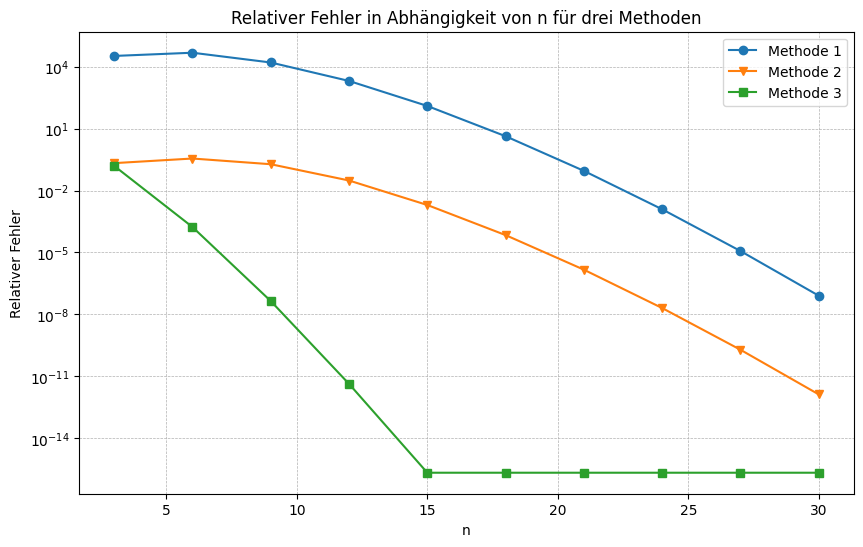

In [6]:
horner_meth1_Erel = [relFehler(values) for (keys,values) in horner_methode1.items()]
horner_meth2_Erel = [relFehler(values) for (keys,values) in horner_methode2.items()]
horner_meth3_Erel = [relFehler(values) for (keys,values) in horner_methode3.items()]


plt.figure(figsize=(10, 6))

plt.plot(n_werte, horner_meth1_Erel, label="Methode 1", marker='o')
plt.plot(n_werte, horner_meth2_Erel, label="Methode 2", marker='v')
plt.plot(n_werte, horner_meth3_Erel, label="Methode 3", marker='s')

plt.yscale('log')

plt.xlabel("n")
plt.ylabel("Relativer Fehler")
plt.title("Relativer Fehler in Abhängigkeit von n für drei Methoden")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)


plt.show()